In [86]:
import nltk
import numpy as np
import pandas as pd
import inspect
import preprocessor
np.random.seed(37)
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot, distplot, heatmap
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocessor.api import clean
import nltk
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split, GridSearchCV

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

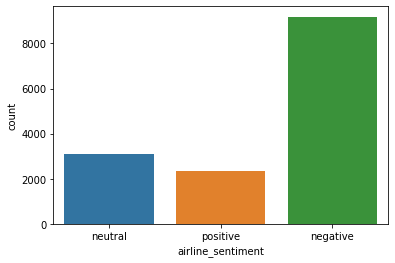

In [6]:
 countplot(x="airline_sentiment", data=df)

https://pypi.org/project/tweet-preprocessor/
Currently supports cleaning, tokenizing and parsing:

URLs
Hashtags
Mentions
Reserved words (RT, FAV)
Emojis
Smileys

In [8]:
 df['prep']=[clean(doc) for doc in df['text']]
 df[['text','prep']].loc[0]

text    @VirginAmerica What @dhepburn said.
prep                             What said.
Name: 0, dtype: object

In [24]:
print(inspect.getsource(preprocessor.preprocess))
print(inspect.getsource(preprocessor.defines.Patterns))

# -*- coding: utf-8 -*-

"""
preprocessor.preprocess
~~~~~~~~~~~~
This module includes preprocess functionality

"""

from .defines import *
from .utils import get_worker_methods


class Preprocess:

    tweet = None

    def __init__(self):
        self.repl = None

    def clean(self, tweet_string, repl):

        cleaner_methods = get_worker_methods(self, Defines.PREPROCESS_METHODS_PREFIX)
        for a_cleaner_method in cleaner_methods:
            token = self.get_token_string_from_method_name(a_cleaner_method)
            method_to_call = getattr(self, a_cleaner_method)

            if repl == Functions.CLEAN:
                tweet_string = method_to_call(tweet_string, '')
            else:
                tweet_string = method_to_call(tweet_string, token)

        tweet_string = self.remove_unneccessary_characters(tweet_string)
        return tweet_string

    def preprocess_urls(self, tweet_string, repl):
        return Patterns.URL_PATTERN.sub(repl, tweet_string)

    def prep

# evaluate TextBlob sentiment analyzer
Add a column to df called 'sentiment_tb' containing the results from apply(lambda
tweet: TextBlob(tweet).sentiment.polarity).

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

https://textblob.readthedocs.io/en/dev/quickstart.html

In [33]:
df['sentiment_tb'] = df.prep.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral


In [34]:
df.sentiment_tb.describe()

count    14640.000000
mean         0.053555
std          0.320756
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          1.000000
Name: sentiment_tb, dtype: float64

Add a column to the data frame called 'sentiment_tb_desc', which value is as follows:
 ‘positive’, if ‘sentiment_tb'>0.5
 ‘negative’, if ‘sentiment_tb'<-0.5
 ‘neutral’, else

In [47]:
# create a list of our conditions
conditions = [
    (df['sentiment_tb'] > 0.5),
    (df['sentiment_tb'] >= -0.5) & (df['sentiment_tb'] <= 0.5),
    (df['sentiment_tb'] < -0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment_tb_desc'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.2716,neutral
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative


<AxesSubplot:xlabel='sentiment_tb_desc', ylabel='count'>

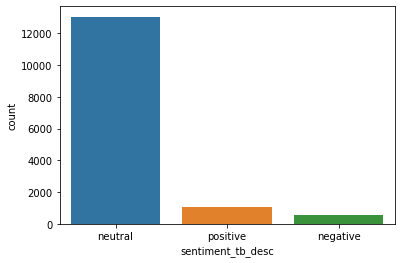

In [48]:
countplot(x='sentiment_tb_desc', data=df)

In [50]:
df[df['sentiment_tb'] > 0.5].head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc
19,570267956648792064,positive,1.0000,NaN,NaN,Virgin America,NaN,JNLpierce,NaN,0,@VirginAmerica you know what would be amazingl...,NaN,2015-02-24 09:04:10 -0800,Boston | Waltham,Quito,you know what would be amazingly awesome? BOS-...,0.6000,positive,0.8795,neutral
22,570259420287868928,positive,1.0000,NaN,NaN,Virgin America,NaN,ElvinaBeck,NaN,0,@VirginAmerica I love the hipster innovation. ...,NaN,2015-02-24 08:30:15 -0800,Los Angeles,Pacific Time (US & Canada),I love the hipster innovation. You are a feel ...,0.6000,positive,0.8658,neutral
34,570076792993611776,positive,1.0000,NaN,NaN,Virgin America,NaN,NorthTxHomeTeam,NaN,0,@VirginAmerica this is great news! America co...,"[33.2145038, -96.9321504]",2015-02-23 20:24:33 -0800,Texas,Central Time (US & Canada),this is great news! America could start flight...,1.0000,positive,0.6588,neutral
35,570051991277342720,neutral,0.6207,NaN,NaN,Virgin America,NaN,miaerolinea,NaN,0,Nice RT @VirginAmerica: Vibe with the moodligh...,NaN,2015-02-23 18:46:00 -0800,Worldwide,Caracas,Nice RT : Vibe with the moodlight from takeoff...,0.6000,positive,0.4215,neutral
36,570051381534396416,positive,1.0000,NaN,NaN,Virgin America,NaN,Nicsplace,NaN,0,@VirginAmerica Moodlighting is the only way to...,NaN,2015-02-23 18:43:35 -0800,Central Texas,NaN,Moodlighting is the only way to fly! Best expe...,0.5875,positive,0.8684,neutral


In [51]:
print(classification_report(df.sentiment_tb_desc, df.airline_sentiment))

              precision    recall  f1-score   support

    negative       0.06      0.95      0.11       546
     neutral       0.94      0.22      0.36     13038
    positive       0.24      0.55      0.34      1056

    accuracy                           0.27     14640
   macro avg       0.41      0.57      0.27     14640
weighted avg       0.85      0.27      0.35     14640



# evaluate Vader sentiment analyzer
https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader.SentimentIntensityAnalyzer

In [61]:
#Vater sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
sid_obj = SentimentIntensityAnalyzer()
df['compound'] = [sid_obj.polarity_scores(c)['compound'] for c in df['prep']]
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc,sentiment_vd,token
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,0.0000,"[What, said.]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,0.0000,"[plus, you've, added, commercials, to, the, ex..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,0.0000,"[I, didn't, today..., Must, mean, I, need, to,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.2716,neutral,-0.5984,"[it's, really, aggressive, to, blast, obnoxiou..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,-0.5829,"[and, it's, a, really, big, bad, thing, about,..."


In [62]:
# create a list of our conditions
conditions = [
    (df['compound'] > 0.5),
    (df['compound'] >= -0.5) & (df['compound'] <= 0.5),
    (df['compound'] < -0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment_vater_desc'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc,sentiment_vd,token
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,0.0000,"[What, said.]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,0.0000,"[plus, you've, added, commercials, to, the, ex..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,0.0000,"[I, didn't, today..., Must, mean, I, need, to,..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.2716,neutral,-0.5984,"[it's, really, aggressive, to, blast, obnoxiou..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,-0.5829,"[and, it's, a, really, big, bad, thing, about,..."


<AxesSubplot:xlabel='sentiment_vater_desc', ylabel='count'>

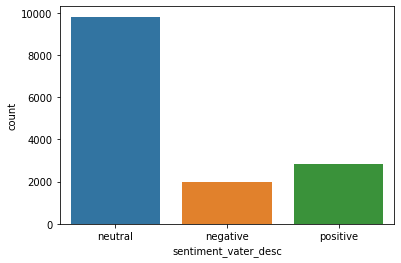

In [53]:
countplot(x='sentiment_vater_desc', data=df)

In [54]:
print(classification_report(df.sentiment_vater_desc, df.airline_sentiment))

              precision    recall  f1-score   support

    negative       0.21      0.95      0.34      2004
     neutral       0.81      0.26      0.39      9809
    positive       0.58      0.49      0.53      2827

    accuracy                           0.40     14640
   macro avg       0.53      0.56      0.42     14640
weighted avg       0.68      0.40      0.41     14640



C:\Anaconda\envs\uni\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\uni\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\uni\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='neutral', ylabel='Density'>

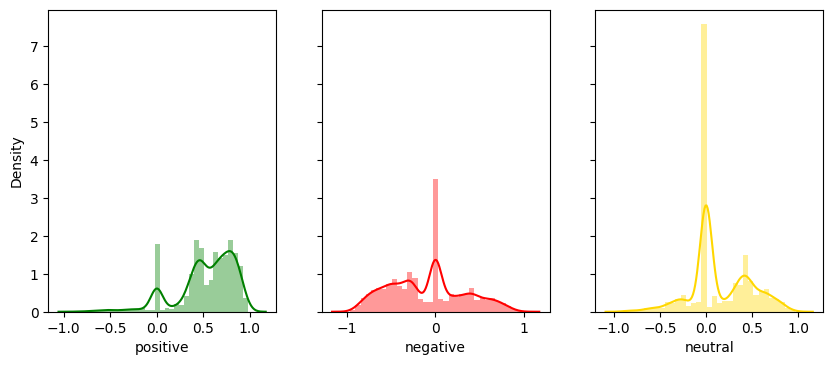

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
distplot(df.loc[df.airline_sentiment=='positive', "compound"] , color="green", ax=axes[0], axlabel='positive')
distplot(df.loc[df.airline_sentiment=='negative', "compound"] , color="red", ax=axes[1], axlabel='negative')
distplot(df.loc[df.airline_sentiment=='neutral', "compound"] , color="gold", ax=axes[2], axlabel='neutral')


# Representation


Apply a tf-idf vectorizer (max_df=0.99, min_df=0.01, stop_words='english') to the data
and call the result tf.

In [83]:
vectorizer = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english', smooth_idf=False) # TF_IDF2
tf = pd.DataFrame(vectorizer.fit_transform(df.prep).toarray())
tf.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.64929,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.741313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
words = vectorizer.get_feature_names()
print(words)
print(len(words))

['aa', 'agent', 'agents', 'airline', 'airlines', 'airport', 'amp', 'bad', 'bag', 'baggage', 'bags', 'best', 'better', 'boarding', 'book', 'booked', 'cancelled', 'care', 'change', 'check', 'connection', 'crew', 'customer', 'customers', 'day', 'days', 'delay', 'delayed', 'delays', 'dfw', 'did', 'didn', 'dm', 'does', 'doesn', 'don', 'email', 'experience', 'fleek', 'fleet', 'flight', 'flighted', 'flightled', 'flightr', 'flights', 'fly', 'flying', 'gate', 'getting', 'going', 'good', 'got', 'great', 'guys', 'help', 'hold', 'home', 'hour', 'hours', 'hrs', 'issue', 'jfk', 'just', 'know', 'late', 'left', 'let', 'like', 'line', 'll', 'long', 'lost', 'love', 'luggage', 'make', 'miles', 'min', 'minutes', 'miss', 'morning', 'need', 'new', 'night', 'number', 'online', 'passengers', 'people', 'phone', 'plane', 'problems', 'really', 'reservation', 'response', 'right', 'said', 'seat', 'seats', 'sent', 'service', 'sitting', 'staff', 'stuck', 'sure', 'thank', 'thanks', 'think', 'ticket', 'time', 'times',

In [87]:
docs_train, docs_test, y_train, y_test = train_test_split(tf, df.airline_sentiment,test_size = 0.20, random_state = 12)

In [98]:
y_train

11149    negative
142       neutral
1405     negative
13024    negative
8992     negative
           ...   
7409     negative
3325     negative
9606     positive
5787      neutral
14155    negative
Name: airline_sentiment, Length: 11712, dtype: object

# Modelling supervised
Build a classification model using and a random forest with 3-
fold-cross validation with grid search using the following parameters:
 param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200,
300, 1000]}
 random_state = 42 (for the random forest)

In [88]:
model = RandomForestClassifier(random_state = 42)

In [95]:
clf = GridSearchCV(model, param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10,50,100, 200, 300, 1000]}, cv = 3, n_jobs = -1)
clf.fit(docs_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200, 300, 1000]})

In [96]:
print(clf.best_score_)
print(clf.best_estimator_)

0.7050034153005464
RandomForestClassifier(min_samples_leaf=3, n_estimators=300, random_state=42)


In [100]:
forest = RandomForestClassifier(random_state = 42, min_samples_leaf=3, n_estimators=300)
forest.fit(docs_train, y_train)
y_pred = forest.predict(docs_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1876
     neutral       0.49      0.42      0.45       569
    positive       0.71      0.51      0.59       483

    accuracy                           0.72      2928
   macro avg       0.66      0.60      0.62      2928
weighted avg       0.71      0.72      0.71      2928



In [101]:
forest_pred = forest.predict(tf)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [102]:
df['forest_pred'] = forest_pred
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc,forest_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,negative
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,negative
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.2716,neutral,negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,negative


In [103]:
print(classification_report(df.forest_pred, df.airline_sentiment))

              precision    recall  f1-score   support

    negative       0.89      0.80      0.84     10218
     neutral       0.49      0.56      0.52      2676
    positive       0.54      0.73      0.62      1746

    accuracy                           0.74     14640
   macro avg       0.64      0.70      0.66     14640
weighted avg       0.77      0.74      0.75     14640



# Modelling unsupervised

In [105]:
kmeans = KMeans(n_clusters = 3, max_iter=200)
kmeans.fit(tf)

KMeans(max_iter=200, n_clusters=3)

In [106]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
 print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : service, just, customer, flights, help, time, plane, amp, hold, bag
1 : thanks, thank, great, flight, just, service, help, response, customer, got
2 : flight, cancelled, flightled, delayed, late, hours, time, help, just, flighted


In [108]:
df['kmeans_pred'] = kmeans.labels_
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,prep,sentiment_tb,sentiment_tb_desc,compound,sentiment_vater_desc,forest_pred,kmoeans_pred,kmeans_pred
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),What said.,0.000000,neutral,0.0000,neutral,negative,0,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,0.000000,neutral,0.0000,neutral,negative,0,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,-0.390625,neutral,0.0000,neutral,negative,0,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",0.006250,neutral,-0.2716,neutral,negative,0,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,-0.350000,neutral,-0.5829,negative,negative,0,0


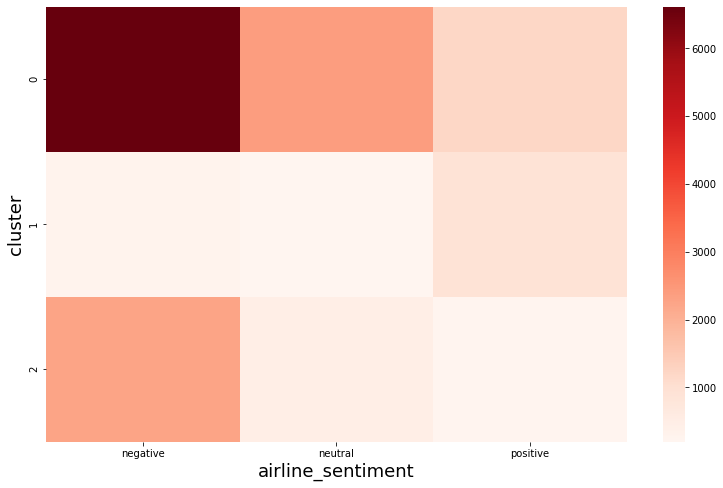

In [109]:
from seaborn import heatmap
clusters = df.groupby(['kmeans_pred', 'airline_sentiment']).size()
fig, ax1 = plt.subplots(figsize = (13,8))
heatmap(clusters.unstack(level = 'airline_sentiment'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('airline_sentiment').set_size(18)
ax1.set_ylabel('cluster').set_size(18)

In [111]:
df['kmeans_pred_desc'] = ''
for index, row in df.iterrows():
    if row.kmeans_pred == 0:
        df.loc[index,'kmeans_pred_desc'] = 'negative'
    if row.kmeans_pred == 1:
        df.loc[index,'kmeans_pred_desc'] = 'positive'
    if row.kmeans_pred == 2:
        df.loc[index,'kmeans_pred_desc'] = 'neutral'

In [112]:
print(classification_report(df.kmeans_pred_desc, df.airline_sentiment))

              precision    recall  f1-score   support

    negative       0.72      0.65      0.68     10215
     neutral       0.16      0.16      0.16      3019
    positive       0.39      0.65      0.49      1406

    accuracy                           0.55     14640
   macro avg       0.42      0.49      0.44     14640
weighted avg       0.57      0.55      0.56     14640

